# Social Media Mining: Network Measures
### Vincent Malic - Spring 2018

# Module 8.2 Network Measures
* Make an undirected graph that we'll use to demonstrate network measures. 

In [1]:
import networkx as nx

G = nx.Graph()

G.add_edges_from(
    [
        ("a", "b"),
        ("a", "d"),
        ("a", "f"),
        ("b", "g"),
        ("b", "d"),
        ("b", "a"),
        ("b", "e"),
        ("c", "d"),
        ("c", "h"),
        ("d", "a"),
        ("d", "b"),
        ("d", "c"),
        ("d", "e"),
        ("d", "f"),
        ("d", "g"),
        ("e", "b"),
        ("e", "d"),
        ("e", "g"),
        ("f", "a"),
        ("f", "d"),
        ("f", "g"),
        ("f", "h"),
        ("g", "e"),
        ("g", "b"),
        ("g", "f"),
        ("g", "h"),
        ("h", "g"),
        ("h", "f"),
        ("h", "c"),
        ("h", "r"),
        ("h", "i"),
        ("i", "h"),
        ("i", "p"),
        ("i", "j"),
        ("i", "n"),
        ("j", "p"),
        ("j", "m"),
        ("j", "l"),
        ("j", "k"),
        ("j", "o"),
        ("j", "n"),
        ("j", "i"),
        ("k", "j"),
        ("k", "l"),
        ("k", "p"),
        ("l", "m"),
        ("l", "k"),
        ("l", "j"),
        ("m", "l"),
        ("m", "j"),
        ("m", "q"),
        ("n", "i"),
        ("n", "j"),
        ("n", "o"),
        ("o", "n"),
        ("o", "j"),
        ("p", "i"),
        ("p", "j"),
        ("p", "k"),
        ("q", "m"),
        ("q", "s"),
        ("r", "h"),
        ("s", "q")   
    ]
)

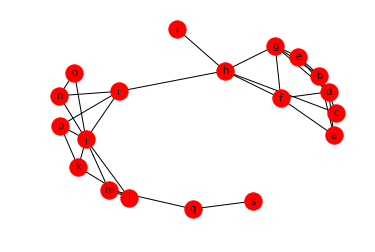

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

pos = nx.spring_layout(G, iterations=100)
nx.draw_networkx_nodes(G, pos, node_size = 300)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.axis("off")
plt.show()

## Degree of a node 
* Count of the number of edges a node has. 
* Use ``degree`` method on a graph to obtain the degree of any given node. 

In [3]:
G.degree("k")

3

# Directed network
Distinguishes edges that originate **from** a node from edges that point **to** a node. 
* **Outdegree** of a node is a count of the number of edges originating from a node
* **indegree** is the number of edges that point to a node. 

## Use networkx function to generate a random directed graph.
* Totally feasible for a node to have very different indegrees and outdegrees.

In [4]:
DG = nx.erdos_renyi_graph(100, 0.4, directed=True)

In [5]:
# indegree of node 37
print(DG.in_degree(37))

# outdegree of node 37
print(DG.out_degree(37))

39
38


# Weighted Network
* Each of the edges has a number corresponding to that edge's weight. 
* Degree of node is **sum of weights of edges that node is connected to**. 

## Generate an undirected, weighted graph. 

In [6]:
import numpy as np
WG = nx.erdos_renyi_graph(100, 0.4)
for edge in WG.edges():
    WG.edge[edge[0]][edge[1]]['weight'] = np.random.randint(0, 10)

## Get weighted degree of node
* Specify the **name of the edge attribute that contains the weight**. 
* In our case, the name of this attribute is ``weight``. 

In [7]:
# The edges of node 37
WG.edge[37]

{1: {'weight': 6},
 2: {'weight': 1},
 5: {'weight': 9},
 6: {'weight': 9},
 7: {'weight': 8},
 9: {'weight': 0},
 12: {'weight': 9},
 13: {'weight': 2},
 19: {'weight': 6},
 20: {'weight': 5},
 23: {'weight': 8},
 24: {'weight': 4},
 25: {'weight': 8},
 27: {'weight': 5},
 30: {'weight': 1},
 35: {'weight': 7},
 36: {'weight': 2},
 38: {'weight': 5},
 39: {'weight': 5},
 41: {'weight': 1},
 46: {'weight': 0},
 49: {'weight': 6},
 51: {'weight': 3},
 53: {'weight': 4},
 54: {'weight': 4},
 55: {'weight': 6},
 58: {'weight': 2},
 59: {'weight': 8},
 61: {'weight': 1},
 64: {'weight': 6},
 66: {'weight': 5},
 67: {'weight': 7},
 68: {'weight': 2},
 69: {'weight': 6},
 70: {'weight': 4},
 72: {'weight': 7},
 78: {'weight': 8},
 80: {'weight': 2},
 81: {'weight': 2},
 82: {'weight': 1},
 87: {'weight': 8},
 88: {'weight': 4},
 90: {'weight': 1},
 92: {'weight': 5},
 95: {'weight': 7},
 98: {'weight': 7}}

### What is degree of node 37?

In [8]:
WG.degree(37, weight="weight") # designate the name of the edge attribute with the parameter weight

217

# Degree Centrality
* Quantifies importance of a node is to simply take into account how many edges they have. 
* A node with a lot of edges is important, a node with fewer edges is less important. 

## Networkx function ``degree_centrality`` 
* Calculates the *normalized degree* for every node in a graph. 
* Normalized by the highest number of connections a node may possibly have: 
* If the number of nodes in a network is $n$, then degree centrality is normalized by $n-1$.

In [9]:
nx.degree_centrality(G)

{'a': 0.16666666666666666,
 'b': 0.2222222222222222,
 'c': 0.1111111111111111,
 'd': 0.3333333333333333,
 'e': 0.16666666666666666,
 'f': 0.2222222222222222,
 'g': 0.2777777777777778,
 'h': 0.2777777777777778,
 'i': 0.2222222222222222,
 'j': 0.38888888888888884,
 'k': 0.16666666666666666,
 'l': 0.16666666666666666,
 'm': 0.16666666666666666,
 'n': 0.16666666666666666,
 'o': 0.1111111111111111,
 'p': 0.16666666666666666,
 'q': 0.1111111111111111,
 'r': 0.05555555555555555,
 's': 0.05555555555555555}

#### In terms of Degree Centrality, node "j" is most important" 
* Node J has normalized degree centrality of 0.39, hub of the community on left
* Node D has second highest degree centrality of 0.33, and is hub of community on right


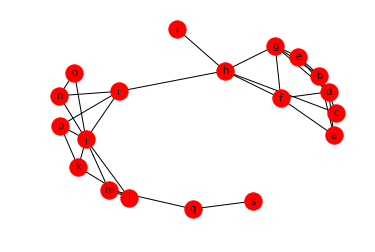

In [10]:
nx.draw_networkx_nodes(G, pos, node_size = 300)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.axis("off")
plt.show()

In [11]:
G.degree("j")

7

# Graph visualization 
* Node j is connected to many other nodes, and has a degree of 7, the highest in the graph. 

## Meaning of Degree Centrality 
Highly dependent on your network, and what is *important* in your dataset:
* A Facebook Friend Network: nodes are Facebook users, and a link exists between two users if they are Facebook friends. Degree centrality represents *how popular* a person is. The higher the centrality, the more friends the user has. 
* A Network of intervenous drug users: Nodes are IV drug users, edge exists if two people have reported they share needles. The person with the highest degree centrality is the person who shares needles with the most people.
* Hashtag Cooccurrence: A node is a hashtag, and an edge exists between two hashtags if they have been used together in the same tweet. The hashtag with the highest degree centrality is a *versatile* hashtag; it can be used in many situations.

# Closeness Centrality
* Measure of how close a node is to **all other nodes in the network**.
* Distance to other nodes in the network is the measures of importance or centrality

### "Six Degrees of Kevin Bacon" Game
Goal is to take less than six steps (degrees) to reach Kevin Bacon. 
* Name an actor - `Michael Caine`; and then name someone this actor has acted with in a movie: 
* Then, find a person who has acted with Actor B in a movie: Actor C. 
* Repeat until you finally arrive at Kevin Bacon. 

## Algorithm for Closeness Centrality:
1. For selected node A, **find the length of the shortest path between it and all other nodes in the network**. 
2. Take the average of those lengths. 
3. The average is normalized by dividing the **longest possible path in the network** by this average. 

### For a given network with $n$ nodes:
* The longest possible path is $n-1$ 
* A hypothetical scenario where if you had to get from node A to B, you have to cross through *all other nodes* in network.
* Normalization is used to get the scale right: 
  * A higher number means the node is **closer** to other nodes, 
  * A lower number means a node is **further away**.

In [12]:
nx.closeness_centrality(G)

{'a': 0.2903225806451613,
 'b': 0.29508196721311475,
 'c': 0.34615384615384615,
 'd': 0.3050847457627119,
 'e': 0.2903225806451613,
 'f': 0.36,
 'g': 0.3673469387755102,
 'h': 0.45,
 'i': 0.46153846153846156,
 'j': 0.42857142857142855,
 'k': 0.3157894736842105,
 'l': 0.32727272727272727,
 'm': 0.3333333333333333,
 'n': 0.375,
 'o': 0.3103448275862069,
 'p': 0.375,
 'q': 0.2608695652173913,
 'r': 0.3157894736842105,
 's': 0.20930232558139536}

### Node `i` has highest closeness centrality, followed by node `h`.
* `i` doesn't have highest degree, but it is closer to all the other nodes on average 

## Examples of Closeness Centrality
* Facebook friend network: the person with the highest closeness centrality is the person who is a short distance from *all* the people in the network. If the person with the highest closeness centrality shares a post, it has a higher potential to *eventually be seen by everyone in the network*.
* IV user network: if this person contracts a disease from IV drug usage, there's more of a risk that everyone in the network will also contract the disease in a shorter period of time. 
* Hashtag cooccurence network: the hashtag with the highest closeness centrality is not necessarily popular, but it is probably *very general and non-specific*. It has very broad meaning, shortest distance to other hashtags (e.g., politics, fashion, food, cities, etc.) 

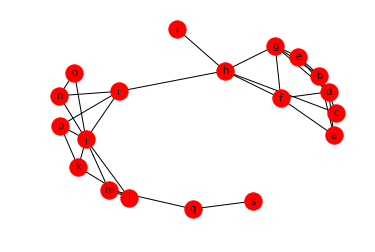

In [13]:
nx.draw_networkx_nodes(G, pos, node_size = 300)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.axis("off")
plt.show()

### NOTE: IMPORTANT LIMITATION IS RUNTIME:
** Calculation of closeness centrality scales very poorly with network size**. 
* To get closeness centrality of *every node* in a network, need to calculate $\frac{n \cdot (n-1)}{2}$ distances. 
* Furthermore, need to find the *shortest* distance; the larger the network, the more possible paths there are between two given nodes. 
  * For graph with 100,000 nodes, calculate 4,999,950,000 distances, and for each distance, it may have to explore a very large number of paths. 
  * For very large network (big data) calculating ``closeness_centrality`` may take a very long time. (may want to use subset of nodes.)

## Measure of Centrality
* Degree centrality: defined by how many links a node has
* Closeness centrality: defined by how close a node is to all other nodes in the network. 
* Betweenness centrality: what makes a node important is *how in-between* it is.

# Betweenness Centrality
* To calculate betweenness centrality is taking *every pair of nodes* and finding the shortest path between them. 
* Next, find the betweenness centrality of a given node, calculate *the fraction of all these shotest paths that include this node*. 

## Meaning of Betweenness Centrality
* Intuitively, a node $X$ has a high betweenness centrality if when traveling from one node to another node in a network, one often has to pass through node $X$. 
* Conceptualually, nodes with high betweenness centrality are *bridge nodes*. 
* To cross from one area of network to another, you have to go through these nodes.

In [14]:
nx.betweenness_centrality(G)

{'a': 0.0021786492374727667,
 'b': 0.005446623093681917,
 'c': 0.026143790849673193,
 'd': 0.037037037037037035,
 'e': 0.0,
 'f': 0.10675381263616555,
 'g': 0.18845315904139442,
 'h': 0.5751633986928105,
 'i': 0.5326797385620915,
 'j': 0.434640522875817,
 'k': 0.0032679738562091504,
 'l': 0.00980392156862745,
 'm': 0.20915032679738563,
 'n': 0.032679738562091505,
 'o': 0.0,
 'p': 0.032679738562091505,
 'q': 0.11111111111111112,
 'r': 0.0,
 's': 0.0}

### Node `h` has the highest betweenness centrality

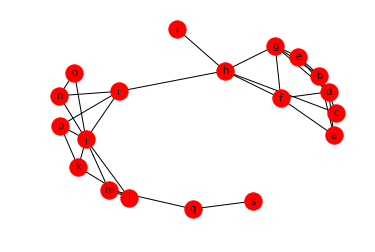

In [15]:
nx.draw_networkx_nodes(G, pos, node_size = 300)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.axis("off")
plt.show()

## Comparing Measures of Centrality
* Node `h` has highest **betweenness centrality**; to reach node r from *any other node*, one most pass through h. Node h is the bridge or "gate keeper," so to speak. 
* Node `i` has highest **closeness centrality**, is closer to all other nodes in network, on average, and also has high betweenness centrality
* Nodes `i` and `h` link the community centered on node j to the community centered on node d; to travel from one community to the other, one *must* travel through nodes i and h.

### Additional connecting nodes
* Node `j` also has a high betweenness centrality, to get to node `i`, nodes `k`, `l`, `m`, `o`, `n`, must pass through j.
* Node `m` has high betweenness centrality; one must pass through node `m` to get to nodes `q` and `s`, but node `m` does not have high degree centrality or closeness centrality.

## Examples of Beweenness Centrality
* Facebook network: node with a high betweenness centrality *links different communities*. Person majoring in both chemistry and art, is friends with people from both departments; info traveling from chemistry student to art student, passes through double major. 
* IV drug user network: People in neighborhood A tend to share needles among themselves, and people in neighbor B tend to share needles among themselves; Individual with high betweenness centrality who shares needles with a person in neighborhood B and neighborhood A. 
* Hashtag cooccurrence network: a hashtag with high betweenness centrality tends to occur alongside unexpected combinations of hashtags; politics hashtags cluster together, and food hashtags cluster together, but some hashtag occurs with *both* politics and food hashtags.

### IMPORTANT NOTE ON RUNTIME: 
** Calculating betweenness centrality scales poorly with network size.** 
* Networkx ``betweenness_centrality`` method has parameter ``k``, that takes an integer.
* Pass ``k`` to **estimate** betweenness centrality from ``k`` samples, instead of all them. 
* Estimation; the higher ``k`` is, the more accurate the estimation, but takes more time.

# Eigenvector (EV) Centrality
* Not all links are created equally, some links more important, have more weight than others
* Citation network: paper may be cited few times, by *important papers by important authors*, those citations are considered hihgly valuable, than citations by *low-ranked papers* 

## Basic Idea of Eigenvector (EV) centrality
** A node with link from another node with many links, will be more important**.
* Example: Google's PageRank algorithm ranks Google Search results is variation of EV centrality.
* Webpage A receives 5 incoming links from highly connected web pages (e.g., BBC, NYT)
* Webpage A receives 1000 incoming links from minor pages with few connections. 

PageRank Algorithm at work:
<img src="https://upload.wikimedia.org/wikipedia/commons/f/fb/PageRanks-Example.svg">

### EV Centrality in Action:
* Node `B` has an indegree of 6, and so does node `E`. 
* Node `E` receives incoming links mostly from minor nodes with few incoming links.
* PageRank gives `B` higher rank because it receives incoming links from higher rated nodes. 
* Node C has indegree of 1, but PageRank is high because incoming node is from important node.

### Calculate Eigenvector Centrality using NetworkX:

In [16]:
nx.eigenvector_centrality(G)

{'a': 0.28618176306341425,
 'b': 0.35996294011123425,
 'c': 0.18140671187622603,
 'd': 0.46467020048465585,
 'e': 0.3040836189463251,
 'f': 0.3548434410782794,
 'g': 0.4286246181260994,
 'h': 0.28298333308967794,
 'i': 0.1327556499891029,
 'j': 0.11722740340935621,
 'k': 0.059696930852567005,
 'l': 0.05366165312911117,
 'm': 0.04423183819559999,
 'n': 0.07178371718524408,
 'o': 0.04586179444984825,
 'p': 0.07514071770955313,
 'q': 0.01140392759564362,
 'r': 0.06866167801486518,
 's': 0.002767084867422452}

### Node d has the highest eigenvector centrality (0.46)
* Followed by node g (0.42) and node b (0.36).

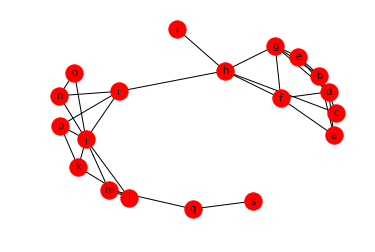

In [17]:
nx.draw_networkx_nodes(G, pos, node_size = 300)
nx.draw_networkx_edges(G, pos)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.axis("off")
plt.show()

## Examples of Eigenvector Centrality
* Nodes `d` and `j` have similar degrees, but eigenvector centrality for node `d` is higher.
* Nodes that "support" node `d` have more incoming links, so their "support" counts for more.
* Nodes that "support" node `j` by linking to it themselves don't have many links. 

### Facebook friend network: 
* User with a high eigenvector centrality is "friends with people who themselves have a lot of friends." 
* With Eigenvector centrality, we can differentiate two different types of "popularity." If someone has a high degree centrality but a low eigenvector centrality, they have a lot of friends, but those friends don't possess a lot of connections themselves.

### IV drug user network:
* User with high eigenvector centrality shares needles with other people who share a lot of needles, and are very high-risk.
* Someone with high degree centrality may be at low risk *if* the people they share needles with do not themselves share with many other people.

### Hashtag cooccurrence network: 
* Hashtag with a high eigenvector centrality is used often with *other* popular hashtags. 
* Hashtag may not have a high degree centrality, but in that case the few hashtags it does occur with are popular and widely used. 

## Correlations between Measure of Centrality
Sometime a node with high degree centrality can also have a high closeness, betweenness, and eigenvector centrality: 
* EXAMPLE: Tight knit community may have single dominant node at center of network. 
* Hub has high degree centrality (lot of links), closeness centrality (closest to every node), betweenness centrality (bridges nodes A to Z) and eigenvector centrality (links to important others).
* But this is rarely the case

This image from the Wikipedia page is illustrative:
* A is Betweenness Centrality, 
* B is Closeness Centrality, 
* C is Eigenvector Centrality, 
* D is Degree centrality

<img src="https://upload.wikimedia.org/wikipedia/commons/1/11/6_centrality_measures.png">

### Interpretation of Centrality Measures 
* Closeness Centrality (B) is high for nodes in "middle" of the network
* Betweenness Centrality is high for nodes that link different dense regions of the network. 
* Degree centrality (D) highlights the "hubs" of different communities.
* Eigenvector Centrality (C) favors the grouping on the lower right, seeing all other parts of the network as not important.

Truly the only way to determine if these measures are correlated is simply to calculate them for the dataset you are working with. 